📁 Please upload the Excel file named 'Ex-prob19.xlsx'


Saving Ex-prob19.xlsx to Ex-prob19.xlsx


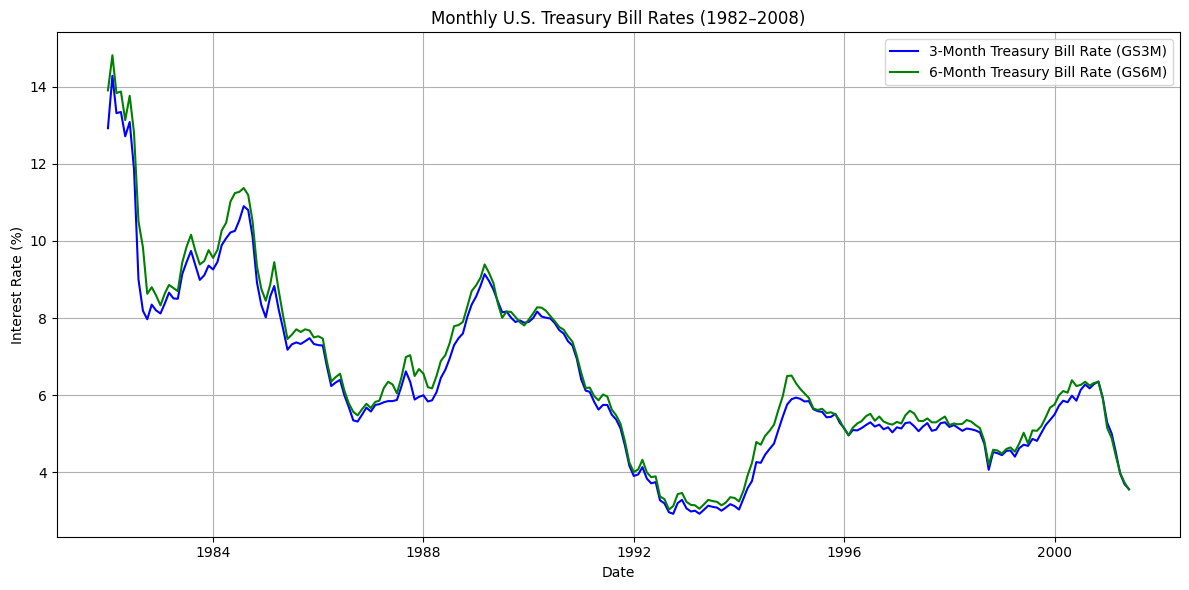


📊 Visual Interpretation:
Both GS3M and GS6M move closely together over time, suggesting strong co-movement and potential long-run relationship.

📉 UNIT ROOT TESTS (LEVELS)

ADF Test for GS3M:
  Test Statistic: -1.5392
  P-value: 0.5140
  Conclusion: ❌ Non-stationary (unit root present)

KPSS Test for GS3M:
  Test Statistic: 1.4540
  P-value: 0.0100
  Conclusion: ❌ Non-stationary (reject stationarity)

ADF Test for GS6M:
  Test Statistic: -3.7738
  P-value: 0.0032
  Conclusion: ✅ Stationary (reject unit root)

KPSS Test for GS6M:
  Test Statistic: 1.4961
  P-value: 0.0100
  Conclusion: ❌ Non-stationary (reject stationarity)

📉 UNIT ROOT TESTS (FIRST DIFFERENCES)

ADF Test for GS3M (First Difference):
  Test Statistic: -5.5734
  P-value: 0.0000
  Conclusion: ✅ Stationary (reject unit root)

KPSS Test for GS3M (First Difference):
  Test Statistic: 0.1444
  P-value: 0.1000
  Conclusion: ✅ Stationary (fail to reject stationarity)

ADF Test for GS6M (First Difference):
  Test Statistic: -7.

/tmp/ipython-input-2717540648.py:53: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, _, _ = kpss(series, regression='c', nlags="auto")
/tmp/ipython-input-2717540648.py:53: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, _, _ = kpss(series, regression='c', nlags="auto")
/tmp/ipython-input-2717540648.py:53: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, _, _ = kpss(series, regression='c', nlags="auto")
/tmp/ipython-input-2717540648.py:53: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is grea

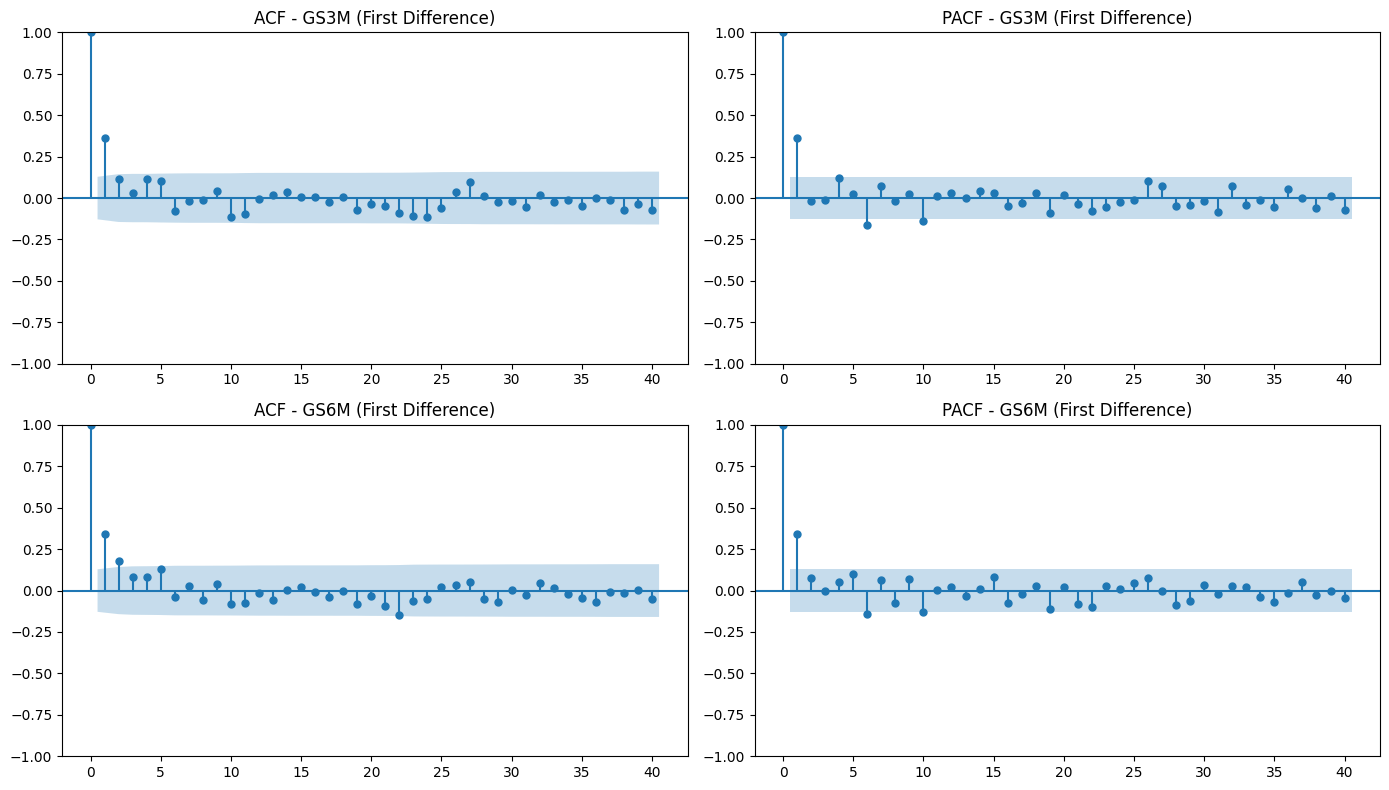


🔗 Engle–Granger Cointegration Test:
  Test Statistic: -4.7367
  P-value: 0.0005
  Conclusion: ✅ Cointegrated (long-run relationship)

🧠 Interpretation:
The GS3M and GS6M series are cointegrated, indicating a long-run equilibrium relationship between short-term interest rates.
➡️ We estimate the VAR model in levels.

📈 VAR(4) Model Summary:
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 01, Nov, 2025
Time:                     15:21:17
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -6.60086
Nobs:                     230.000    HQIC:                  -6.76139
Log likelihood:           155.330    FPE:                 0.00103864
AIC:                     -6.86993    Det(Omega_mle):     0.000961886
--------------------------------------------------------------------
Results for equation GS3M
             coefficient       std. error 

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Figure size 1200x600 with 0 Axes>

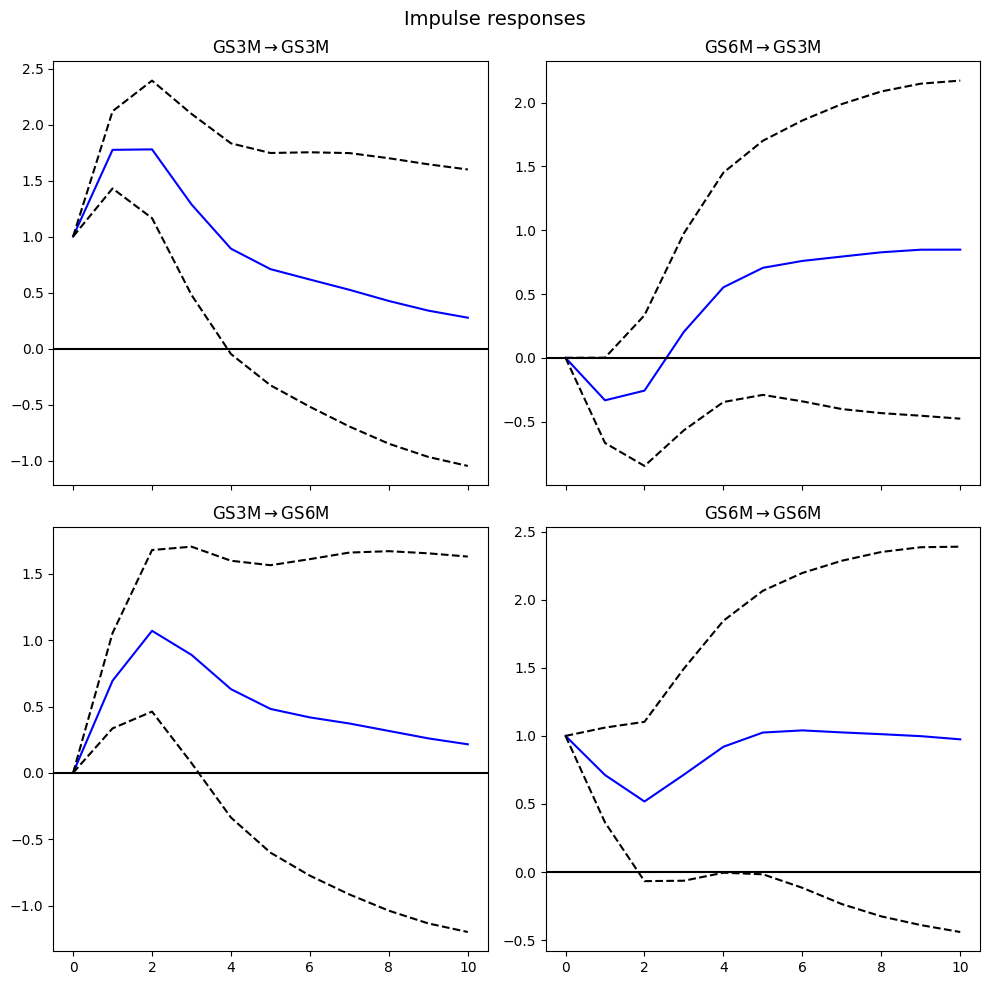

<Figure size 1200x600 with 0 Axes>

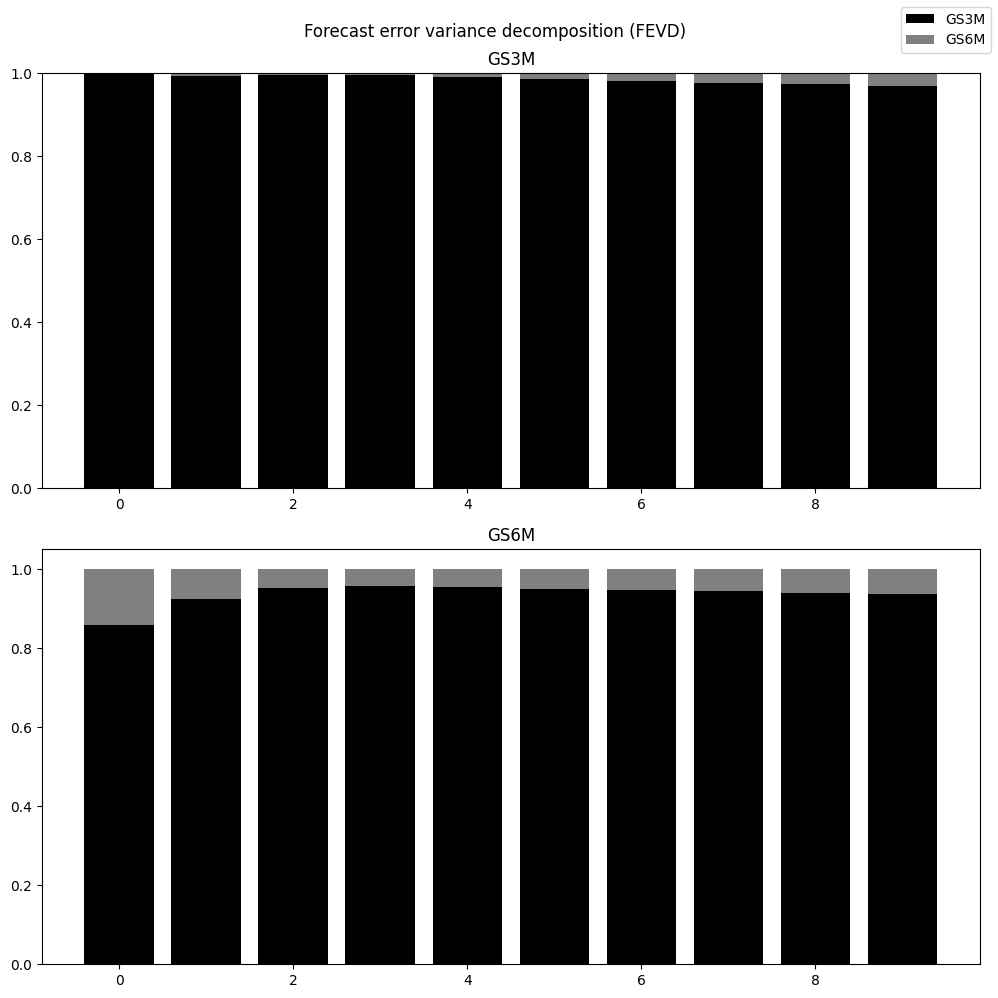


📝 Summary of Findings:
- ADF and KPSS tests confirm both GS3M and GS6M are non-stationary in levels but stationary in first differences.
- Correlograms suggest short memory in first differences, supporting VAR modeling.
- The Engle–Granger test indicates cointegration, suggesting a long-run equilibrium relationship.
- Therefore, we estimate the VAR model in levels.
- The VAR(4) model captures dynamic interactions between the two interest rates.
- Impulse response and FEVD plots provide insights into how shocks propagate across the system.


In [1]:
# -----------------------------------------------
# Time Series Econometrics Analysis in Google Colab
# U.S. Treasury Bill Rates: GS3M and GS6M (1982–2008)
# -----------------------------------------------

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, coint, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from google.colab import files

# Step 2: Upload the Excel file manually
print("📁 Please upload the Excel file named 'Ex-prob19.xlsx'")
uploaded = files.upload()

# Step 3: Load the uploaded Excel file into a DataFrame
filename = list(uploaded.keys())[0]
df = pd.read_excel(filename)

# Step 4: Parse the date column and set it as index
df['obs'] = pd.to_datetime(df['obs'], format='%Y:%m')
df.set_index('obs', inplace=True)

# Step 5: Plot both time series
plt.figure(figsize=(12, 6))
plt.plot(df['GS3M'], label='3-Month Treasury Bill Rate (GS3M)', color='blue')
plt.plot(df['GS6M'], label='6-Month Treasury Bill Rate (GS6M)', color='green')
plt.title('Monthly U.S. Treasury Bill Rates (1982–2008)')
plt.xlabel('Date')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Visual interpretation
print("\n📊 Visual Interpretation:")
print("Both GS3M and GS6M move closely together over time, suggesting strong co-movement and potential long-run relationship.")

# Step 7: Unit Root Tests (ADF and KPSS)
def adf_test(series, name):
    result = adfuller(series)
    print(f"\nADF Test for {name}:")
    print(f"  Test Statistic: {result[0]:.4f}")
    print(f"  P-value: {result[1]:.4f}")
    print("  Conclusion:", "✅ Stationary (reject unit root)" if result[1] < 0.05 else "❌ Non-stationary (unit root present)")

def kpss_test(series, name):
    statistic, p_value, _, _ = kpss(series, regression='c', nlags="auto")
    print(f"\nKPSS Test for {name}:")
    print(f"  Test Statistic: {statistic:.4f}")
    print(f"  P-value: {p_value:.4f}")
    print("  Conclusion:", "❌ Non-stationary (reject stationarity)" if p_value < 0.05 else "✅ Stationary (fail to reject stationarity)")

print("\n📉 UNIT ROOT TESTS (LEVELS)")
adf_test(df['GS3M'], 'GS3M')
kpss_test(df['GS3M'], 'GS3M')

adf_test(df['GS6M'], 'GS6M')
kpss_test(df['GS6M'], 'GS6M')

# Step 8: First differences
df_diff = df.diff().dropna()

print("\n📉 UNIT ROOT TESTS (FIRST DIFFERENCES)")
adf_test(df_diff['GS3M'], 'GS3M (First Difference)')
kpss_test(df_diff['GS3M'], 'GS3M (First Difference)')

adf_test(df_diff['GS6M'], 'GS6M (First Difference)')
kpss_test(df_diff['GS6M'], 'GS6M (First Difference)')

# Step 9: Correlograms (ACF and PACF)
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
plot_acf(df_diff['GS3M'], ax=axes[0, 0], lags=40, title='ACF - GS3M (First Difference)')
plot_pacf(df_diff['GS3M'], ax=axes[0, 1], lags=40, title='PACF - GS3M (First Difference)')
plot_acf(df_diff['GS6M'], ax=axes[1, 0], lags=40, title='ACF - GS6M (First Difference)')
plot_pacf(df_diff['GS6M'], ax=axes[1, 1], lags=40, title='PACF - GS6M (First Difference)')
plt.tight_layout()
plt.show()

# Step 10: Engle–Granger cointegration test
coint_result = coint(df['GS3M'], df['GS6M'])
print("\n🔗 Engle–Granger Cointegration Test:")
print(f"  Test Statistic: {coint_result[0]:.4f}")
print(f"  P-value: {coint_result[1]:.4f}")
print("  Conclusion:", "✅ Cointegrated (long-run relationship)" if coint_result[1] < 0.05 else "❌ Not cointegrated")

# Step 11: Interpretation of cointegration
print("\n🧠 Interpretation:")
if coint_result[1] < 0.05:
    print("The GS3M and GS6M series are cointegrated, indicating a long-run equilibrium relationship between short-term interest rates.")
    print("➡️ We estimate the VAR model in levels.")
    var_data = df[['GS3M', 'GS6M']]
else:
    print("The series are not cointegrated, so we estimate the VAR model in first differences.")
    print("➡️ We estimate the VAR model in first differences.")
    var_data = df_diff[['GS3M', 'GS6M']]

# Step 12: Fit a VAR model with 4 lags
model = VAR(var_data)
results = model.fit(4)

# Step 13: Show model summary
print("\n📈 VAR(4) Model Summary:")
print(results.summary())

# Step 14: Plot impulse response functions
irf = results.irf(10)
plt.figure(figsize=(12, 6))
irf.plot(orth=False)
plt.tight_layout()
plt.show()

# Step 15: Forecast error variance decomposition
fevd = results.fevd(10)
plt.figure(figsize=(12, 6))
fevd.plot()
plt.tight_layout()
plt.show()

# Step 16: Final summary
print("\n📝 Summary of Findings:")
print("- ADF and KPSS tests confirm both GS3M and GS6M are non-stationary in levels but stationary in first differences.")
print("- Correlograms suggest short memory in first differences, supporting VAR modeling.")
print("- The Engle–Granger test indicates cointegration, suggesting a long-run equilibrium relationship.")
print("- Therefore, we estimate the VAR model in levels.")
print("- The VAR(4) model captures dynamic interactions between the two interest rates.")
print("- Impulse response and FEVD plots provide insights into how shocks propagate across the system.")

**Copilot:**

User: I need a complete, runnable Python script for Google Colab that performs a full time-series econometrics analysis using data from an Excel file called Ex-prob19.xlsx, which contains monthly U.S. Treasury bill rates:
GS3M (3-month Treasury bill rate) GS6M (6-month Treasury bill rate) covering January 1982 to March 2008 (315 observations).
Please write clean, well-commented code that does the following steps in order:
•	Import all necessary libraries (pandas, numpy, matplotlib, statsmodels, etc.).
•	Upload and load the Excel file (Ex-prob19.xlsx) into a DataFrame.
•	Plot both time series (TB3M and TB6M) in the same graph with clear labels, title, and legend.
•	Interpret visually what we see in the plot (for example, whether they move together).
•	Perform Augmented Dickey–Fuller (ADF) tests for unit roots on both series in levels and in first differences, printing test statistics and p-values.
•	Conduct an Engle–Granger cointegration test (statsmodels.tsa.stattools.coint) and display the test statistic and p-value.
•	Include a brief printed interpretation explaining whether the series are cointegrated and what that means economically (e.g., long-run equilibrium relationship).
•	Based on the results, determine whether a VAR model should be estimated in levels or first differences.
•	Fit a VAR model with four lags (statsmodels.tsa.api.VAR) using the appropriate form of the data.
•	Show model summary and optionally plot impulse responses or forecast error variance decomposition.
Requirements:
•	The code must run directly in Google Colab without modification.
•	Include inline explanations (comments) before each major block of code.
•	Use clear and labeled plots (titles, axes labels, legends).
•	At the end, print a short summary interpretation of findings (stationarity, cointegration, and model choice).
•	Output format: one complete, executable Python script that can be copied and run in Colab.

Copilot: (Provides a complete, well-commented Python script with all requested steps.)

User: fix this and give me a full code:
FileNotFoundError: No such file or directory: 'Ex-prob19.xlsx' i will update an excel file

Copilot: (Provides a fixed version of the script that dynamically loads the uploaded file using files.upload() and avoids hardcoding the filename.)

User: add cointegrations and correlograms, KPSS test in the code
Copilot: (Provides an enhanced version of the script that includes KPSS tests, ACF/PACF plots, and cointegration testing.)

User: add unit roof test in the code and give me the full one

Copilot: (Clarifies that ADF and KPSS are standard unit root tests, and provides a fully organized and labeled version of the script with all previous steps plus clearer labeling of unit root testing.)

User: give me a transcription of this conversation



In [ ]:
# PARA EXPORTAR

from google.colab import files
import nbformat
from nbconvert import HTMLExporter

# Paso 1: Cargar tu archivo .ipynb
print("Por favor, selecciona tu archivo .ipynb")
uploaded = files.upload()

# Paso 2: Obtener el nombre del archivo cargado
notebook_filename = list(uploaded.keys())[0]
print(f"\nArchivo cargado: {notebook_filename}")

# Paso 3: Leer el notebook
with open(notebook_filename, 'r', encoding='utf-8') as f:
    notebook = nbformat.read(f, as_version=4)

# Paso 4: Convertir a HTML
print("Convirtiendo a HTML...")
html_exporter = HTMLExporter()
html_exporter.template_name = 'classic'
(body, resources) = html_exporter.from_notebook_node(notebook)

# Paso 5: Guardar el archivo HTML
html_filename = notebook_filename.replace('.ipynb', '.html')
with open(html_filename, 'w', encoding='utf-8') as f:
    f.write(body)

print(f"Conversión completada: {html_filename}")

# Paso 6: Descargar el archivo HTML
print("Descargando archivo HTML...")
files.download(html_filename)
print("¡Listo! Tu archivo HTML ha sido descargado.")

**Interpretación de los resultados**

Para evaluar la estacionariedad de las tasas de interés a tres meses (GS3M) y seis meses (GS6M), se aplicaron las pruebas ADF y KPSS tanto en niveles como en primeras diferencias.

Resultados:
Serie	ADF	p-value	KPSS	p-value	Conclusión
GS3M (nivel)	-1.54	0.514	1.454	0.010	No estacionaria
GS6M (nivel)	-3.77	0.003	1.496	0.010	No estacionaria (resultados mixtos)
GS3M (1ª diferencia)	-5.57	0.000	0.144	0.100	Estacionaria
GS6M (1ª diferencia)	-7.98	0.000	0.161	0.100	Estacionaria

La prueba ADF no rechaza la hipótesis nula de raíz unitaria en niveles, mientras que la prueba KPSS que parte de la hipótesis nula de estacionariedad la rechaza. Esta combinación de resultados es consistente con la presencia de una tendencia estocástica.

Una vez diferenciadas, ambas series se vuelven estacionarias (p-values ADF 0.0000 y KPSS no rechaza la estacionariedad).
Por lo que las tasas de corto plazo se presentan de forma estocástica, típica de series financieras que siguen un proceso de tipo random walk con reversión parcial a la media.

**Análisis de los correlogramas (ACF y PACF)**

Los correlogramas confirman los resultados anteriores:
En niveles, tanto la ACF como la PACF decaen lentamente, sin cortarse bruscamente, lo que sugiere no estacionariedad y la presencia de una raíz unitaria.
En primeras diferencias, los correlogramas muestran un corte rápido después del primer rezago, con pocos picos significativos.
Esto implica que las series diferenciadas son procesos de memoria corta, adecuados para un modelo VAR estacionario.
En términos prácticos, las variaciones mensuales de las tasas son aleatorias alrededor de su media, pero los niveles mantienen un componente común de tendencia.

**Prueba de cointegración (Engle–Granger)**

La prueba de Engle–Granger arroja los siguientes resultados:

•	Estadístico: -4.7367
•	p-value: 0.0005
•	Conclusión: Cointegradas

La evidencia sugiere que existe una combinación lineal estacionaria entre GS3M y GS6M, aunque ambas tasas sean no estacionarias individualmente, mantienen un equilibrio de largo plazo.
Si una de las tasas se desvía temporalmente de esta relación, la otra ajusta gradualmente para restablecer el equilibrio.
Los resultados reflejan que las expectativas de la estructura temporal de tasas de interés: las tasas de corto y mediano plazo comparten un componente común (las expectativas sobre la política monetaria futura), y sus movimientos están vinculados por un equilibrio intertemporal.

**Estimación del modelo VAR**

Dado que las series están cointegradas, se estimó un modelo VAR en niveles con 4 rezagos, el cual captura las interdependencias dinámicas de corto plazo entre ambas tasas.
Resultados relevantes:
Ecuación GS3M:
•	L1.GS3M (1.77) fuerte persistencia; la tasa a 3 meses depende significativamente de su propio pasado.
•	L1.GS6M (-0.33, p≈0.05) efecto negativo de la tasa a 6 meses en el corto plazo.
•	L2.GS6M (+0.57, p=0.017) corrección del efecto previo, sugiriendo oscilación de corto plazo.


Ecuación GS6M:
•	L1.GS3M (0.69) y L1.GS6M (0.71), ambas significativas (p<0.01), confirman un ajuste mutuo entre plazos.
•	Los rezagos más largos pierden significancia, lo cual es típico en series con dinámica moderada y cointegración.
Correlación de residuos: 0.93 → alto grado de sincronización contemporánea, coherente con el comportamiento conjunto de tasas que responden al mismo entorno macroeconómico (política monetaria, expectativas de inflación, etc.).

**Resumen de Interpretación**

1.	Raíz unitaria y cointegración:

Las tasas GS3M y GS6M son no estacionarias pero cointegradas, lo que implica que no divergen indefinidamente.
Comparten un mismo componente de tendencia común, probablemente relacionado con el nivel general de las tasas de interés de la economía.

2.	Correlogramas:

En diferencias, las series muestran dependencia de corto plazo, lo que justifica el uso de un VAR para modelar los efectos dinámicos.

3.	VAR:

El modelo sugiere que los movimientos de la tasa a 3 meses influyen significativamente sobre la de 6 meses y viceversa.
En particular, los coeficientes positivos en los primeros rezagos indican reacción inmediata y ajustada entre ambas series.

4.	Implicación financiera:

La cointegración confirma que las tasas a distintos plazos del mercado monetario se mueven coordinadamente, manteniendo una estructura de rendimientos coherente a lo largo del tiempo.
Esto respalda la eficiencia informativa del mercado de bonos de corto plazo: los agentes ajustan rápidamente sus expectativas, reflejando las condiciones actuales y futuras de la política monetaria.
